In [1]:
# Importing Needed Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in user login information into pandas dataframe

logins = pd.read_json('logins.json')
logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
# Setting login_time as index of dataframe & creating count column to keep track of login counts

logins = logins.set_index('login_time')
logins['count'] = 1
logins.head(10)

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
1970-01-01 20:21:41,1
1970-01-01 20:12:16,1
1970-01-01 20:35:47,1
1970-01-01 20:35:38,1


In [4]:
# Aggregating number of logins by 15 minute intervals 

logins_15min = logins['count'].resample('15Min').sum()
logins_15min.head(10)

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
1970-01-01 21:15:00    4
1970-01-01 21:30:00    0
1970-01-01 21:45:00    4
1970-01-01 22:00:00    9
1970-01-01 22:15:00    8
Freq: 15T, Name: count, dtype: int64

In [5]:
# Adding in hour of day, day of month, & day of week columns to provide further insights 

logins_15min = pd.DataFrame({'count': logins_15min.values, 'hour': logins_15min.index.hour, 'day_number': logins_15min.index.day, 'day_of_week': logins_15min.index.dayofweek}, index=logins_15min.index)
logins_15min.head(10)

,count,hour,day_number,day_of_week
login_time,,,,
1970-01-01 20:00:00,2,20,1,3
1970-01-01 20:15:00,6,20,1,3
1970-01-01 20:30:00,9,20,1,3
1970-01-01 20:45:00,7,20,1,3
1970-01-01 21:00:00,1,21,1,3
1970-01-01 21:15:00,4,21,1,3
1970-01-01 21:30:00,0,21,1,3
1970-01-01 21:45:00,4,21,1,3
1970-01-01 22:00:00,9,22,1,3


In [6]:
# No missing data or data quality issues seen

logins_15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 4 columns):
count          9788 non-null int64
hour           9788 non-null int64
day_number     9788 non-null int64
day_of_week    9788 non-null int64
dtypes: int64(4)
memory usage: 382.3 KB


([<matplotlib.axis.XTick at 0x1aef3bc24c8>,
 <a list of 24 Text major ticklabel objects>)

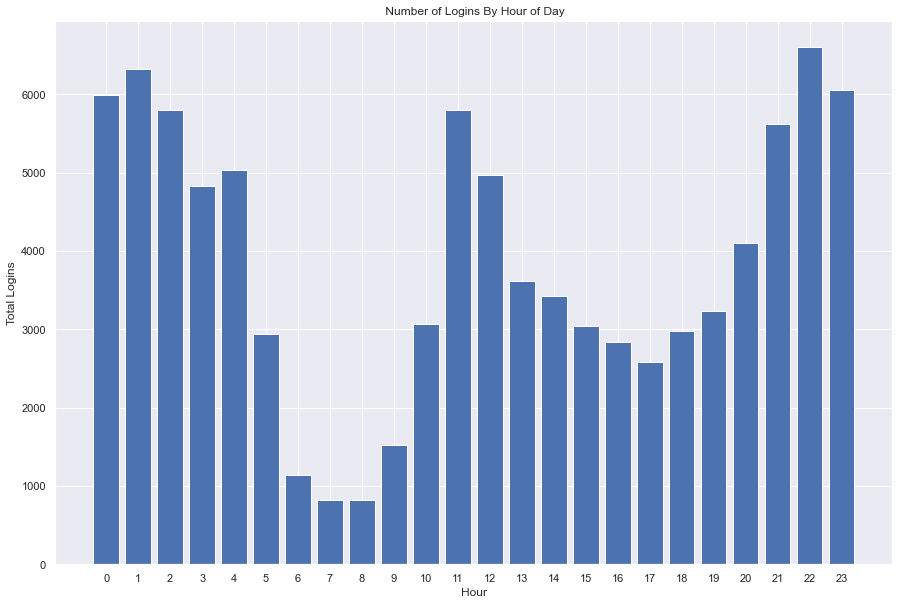

In [15]:
# Plotting number of logins by hour of day

logins_hour = logins_15min.groupby('hour').sum()

sns.set()
plt.figure(figsize=(15,10))
plt.bar(logins_hour.index, logins_hour['count'])
plt.title(' Number of Logins By Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Logins')
plt.xticks(logins_hour.index)

([<matplotlib.axis.XTick at 0x1aef3c93688>,
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')])

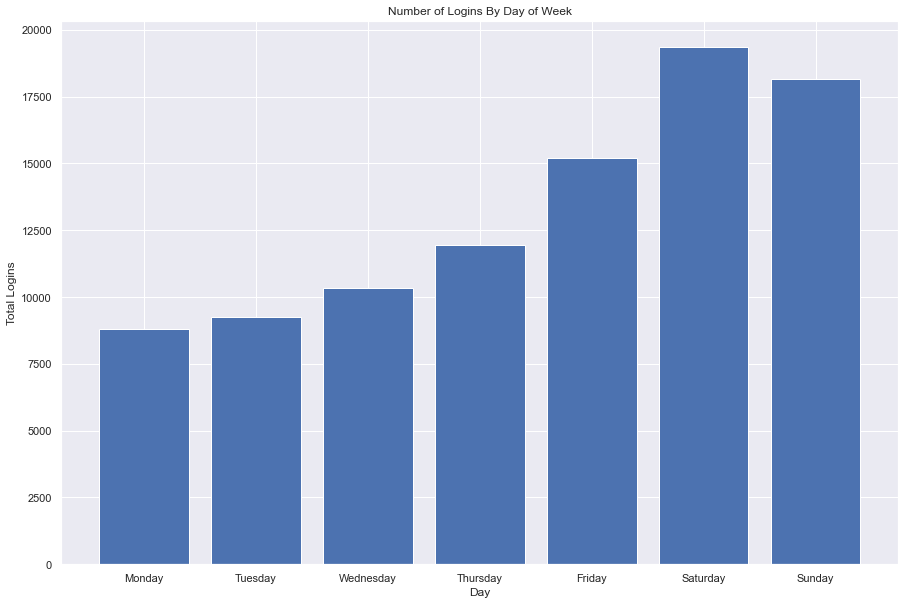

In [16]:
# Plotting number of logins by day of week

logins_day = logins_15min.groupby('day_of_week').sum()

sns.set()
plt.figure(figsize=(15,10))
plt.bar(logins_day.index, logins_day['count'])
plt.title('Number of Logins By Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Logins')
plt.xticks(logins_day.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

([<matplotlib.axis.XTick at 0x1aef45a2a48>,
 [Text(0, 0, 'January'),
  Text(0, 0, 'February'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April')])

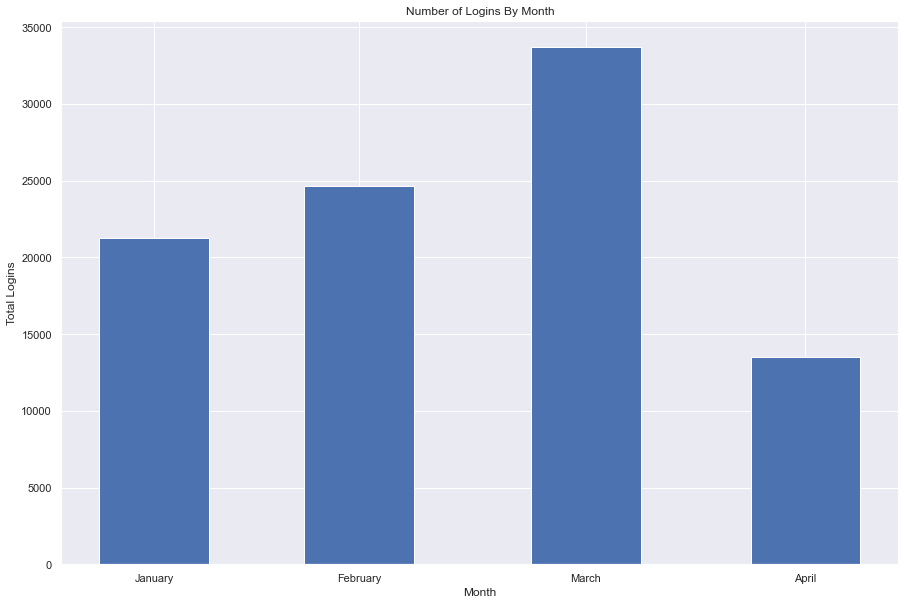

In [22]:
# Plotting number of logins by month

sns.set()
plt.figure(figsize=(15,10))
plt.bar(logins_15min['count'].resample('M').sum().index, logins_15min['count'].resample('M').sum(), width=15.0)
plt.title('Number of Logins By Month')
plt.xlabel('Month')
plt.ylabel('Total Logins')
plt.xticks(logins_15min['count'].resample('M').sum().index, ['January', 'February', 'March', 'April'])

In [24]:
# Loading in rider data for predictive modeling

import json

with open('ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)
    
riders = pd.DataFrame(data)
riders.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [25]:
# avg_rating_of_driver, phone, & avg_rating_by_driver have missing data 

riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [26]:
# Looking into avg_rating_of_driver missing values
# Has 8,122 missing values
# Close to half of values are 5.0, this will be used as value for missing values

riders['avg_rating_of_driver'].value_counts(dropna=False)

5.0    20771
NaN     8122
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.9        1
1.6        1
Name: avg_rating_of_driver, dtype: int64

In [27]:
riders['avg_rating_of_driver'] = riders['avg_rating_of_driver'].fillna(5.0)

In [29]:
# Looking into phone missing values
# Has 396 missing values, relatively small compared to size of dataset
# Missing values will be labeled as 'Missing'

riders['phone'].value_counts(dropna=False)

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

In [30]:
riders['phone'] = riders['phone'].fillna('Missing')

In [31]:
# Looking into avg_rating_by_driver missing values 
# Has 201 missing values
# Over half of values are 5.0, this will be used as value for missing values

riders['avg_rating_by_driver'].value_counts(dropna=False)

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
NaN      201
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
2.7        2
3.2        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

In [32]:
riders['avg_rating_by_driver'] = riders['avg_rating_by_driver'].fillna(5.0)

In [ ]:
# Creating column to contain information about if a rider is still active or not

In [34]:
# Converting datatypes of date attributes from string to datetimes

riders['signup_date'] = pd.to_datetime(riders['signup_date'])
riders['last_trip_date'] = pd.to_datetime(riders['last_trip_date'])

In [35]:
# Rider is active if he/she has taken trip in last 30 days

riders['active'] = riders['last_trip_date'] >= '2014-06-01'

In [36]:
riders.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
6,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False
9,Winterfell,1,2014-01-03,5.0,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False


In [38]:
# Calculate percentage of users that are still active

len(riders[riders['active'] == True]) / 50000

0.37608

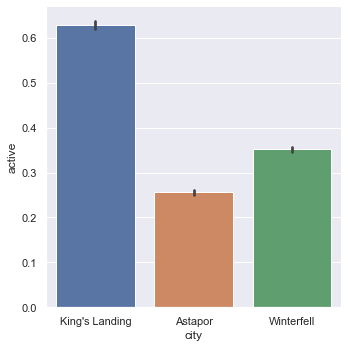

In [45]:
# Seeing active users by city 

sns.catplot(x='city', y='active', kind='bar', data=riders)

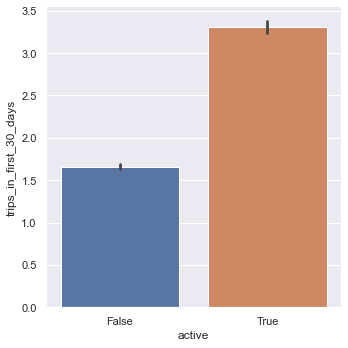

In [41]:
# Seeing avg # of trips taken in first 30 days by active & non-active users 

sns.catplot(x='active', y='trips_in_first_30_days', kind='bar', data=riders)

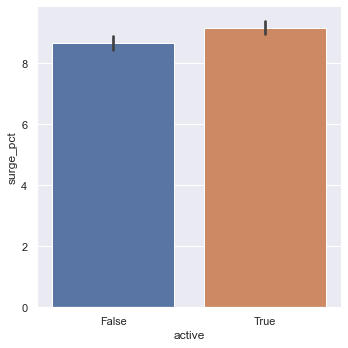

In [42]:
# Seeing avg surge % of active & non-active users 

sns.catplot(x='active', y='surge_pct', kind='bar', data=riders)

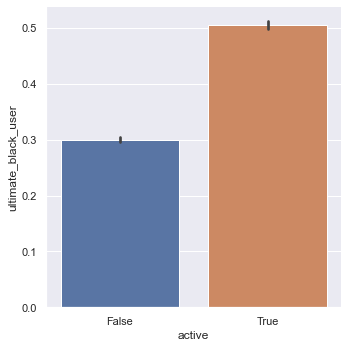

In [43]:
# Seeing % of active & non-active users who used ultimate black in first 30 days 

sns.catplot(x='active', y='ultimate_black_user', kind='bar', data=riders)

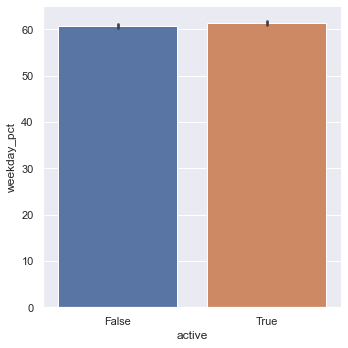

In [46]:
# Seeing % of trips taken on weekdays between active & non-active users 

sns.catplot(x='active', y='weekday_pct', kind='bar', data=riders)

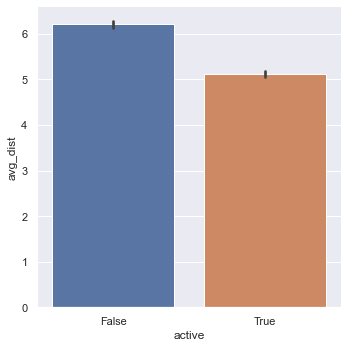

In [47]:
# Seeing avg distance of trips taken by active & non-active users 

sns.catplot(x='active', y='avg_dist', kind='bar', data=riders)

In [ ]:
# Preparing data for ML models

In [48]:
# Adding in active column

riders_ml = pd.DataFrame({'active': riders['active'].values})
riders_ml.head(10)

,active
0,True
1,False
2,False
3,True
4,False


In [49]:
# Adding in continuous variables

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


x = riders.iloc[:, [1, 3, 4, 7, 9, 10, 11]].values
x_scaled = min_max_scaler.fit_transform(x)


scaled = pd.DataFrame(x_scaled, columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])


riders_ml = pd.concat([riders_ml, scaled], axis=1)
riders_ml.head(10)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000
3,True,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975
4,False,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975
5,True,0.016,0.625,0.000000,0.000,1.000,0.065606,1.000
6,False,0.008,1.000,0.000000,0.000,1.000,0.024540,0.750
7,False,0.016,1.000,0.000000,0.000,1.000,0.012674,1.000
8,False,0.016,0.875,0.000000,0.000,1.000,0.027087,1.000
9,False,0.008,1.000,0.000000,0.000,0.000,0.014724,1.000


In [50]:
# Adding in categorical variables

dummies = pd.get_dummies(riders[['city', 'phone']])
riders_ml = pd.concat([riders_ml, dummies], axis=1)
riders_ml.head(10)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Missing,phone_iPhone
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000,0,1,0,0,0,1
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000,1,0,0,1,0,0
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000,1,0,0,0,0,1
3,True,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975,0,1,0,0,0,1
4,False,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975,0,0,1,1,0,0
5,True,0.016,0.625,0.000000,0.000,1.000,0.065606,1.000,0,0,1,0,0,1
6,False,0.008,1.000,0.000000,0.000,1.000,0.024540,0.750,1,0,0,1,0,0
7,False,0.016,1.000,0.000000,0.000,1.000,0.012674,1.000,0,0,1,0,0,1
8,False,0.016,0.875,0.000000,0.000,1.000,0.027087,1.000,0,0,1,1,0,0
9,False,0.008,1.000,0.000000,0.000,0.000,0.014724,1.000,0,0,1,1,0,0


In [51]:
# Adding in remaining variables

riders_ml['ultimate_black_user'] = riders['ultimate_black_user'].values
riders_ml.head(10)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Missing,phone_iPhone,ultimate_black_user
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000,0,1,0,0,0,1,True
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000,1,0,0,1,0,0,False
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000,1,0,0,0,0,1,False
3,True,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975,0,1,0,0,0,1,True
4,False,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975,0,0,1,1,0,0,False
5,True,0.016,0.625,0.000000,0.000,1.000,0.065606,1.000,0,0,1,0,0,1,True
6,False,0.008,1.000,0.000000,0.000,1.000,0.024540,0.750,1,0,0,1,0,0,False
7,False,0.016,1.000,0.000000,0.000,1.000,0.012674,1.000,0,0,1,0,0,1,False
8,False,0.016,0.875,0.000000,0.000,1.000,0.027087,1.000,0,0,1,1,0,0,False
9,False,0.008,1.000,0.000000,0.000,0.000,0.014724,1.000,0,0,1,1,0,0,False


In [52]:
X = riders_ml.drop(['active'], axis=1)
Y = riders_ml.active

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=6)

In [63]:
# Implementing standard random forest classifier model 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
rf.score(X_train, Y_train)

0.9750285714285715

In [64]:
rf.score(X_test, Y_test)

0.7486666666666667

In [66]:
Y_pred = rf.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.78      0.83      0.81      9377
        True       0.68      0.61      0.65      5623

    accuracy                           0.75     15000
   macro avg       0.73      0.72      0.73     15000
weighted avg       0.74      0.75      0.75     15000



In [68]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_pred))

[[7782 1595]
 [2175 3448]]


In [71]:
# Feautre importances of variables within standard random forest classifier model 

feature_importance = pd.DataFrame({'importance': rf.feature_importances_}, index=X_train.columns)
feature_importance.sort_values('importance', ascending=False)

,importance
avg_dist,0.308606
weekday_pct,0.142303
avg_rating_by_driver,0.113810
trips_in_first_30_days,0.082258
avg_rating_of_driver,0.074773
surge_pct,0.072519
avg_surge,0.061415
city_King's Landing,0.056765
ultimate_black_user,0.030795
phone_Android,0.018947


In [70]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [87]:
# Tuned random forest classifer model
# Overall accuracy went down but able to identify more active users 

from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10], 'max_depth': [2,3,4,5,6,7,8,9,10], 'max_features': ['auto', 'sqrt', 'log2']}
rf_tuned = RandomForestClassifier()
grid_tuned = GridSearchCV(rf_tuned, params, cv=3, scoring = 'accuracy')

grid_tuned.fit(X_train, Y_train)
grid_tuned.score(X_train, Y_train)

0.7959714285714286

In [88]:
grid_tuned.score(X_test, Y_test)

0.7850666666666667

In [95]:
grid_tuned.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
Y_pred = grid_tuned.predict(X_test)

In [91]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.80      0.87      0.83      9377
        True       0.75      0.65      0.69      5623

    accuracy                           0.79     15000
   macro avg       0.78      0.76      0.76     15000
weighted avg       0.78      0.79      0.78     15000



In [92]:
print(confusion_matrix(Y_test, Y_pred))

[[8144 1233]
 [1991 3632]]


In [96]:
# Implemnting instance of tuned model to get feature importances

rf_tuned = RandomForestClassifier(n_estimators=10, max_depth=9, max_features = 'log2', min_samples_leaf=1, min_samples_split=2)
rf_tuned.fit(X_train, Y_train)
rf_tuned.score(X_train,Y_train)

0.7964857142857142

In [97]:
rf_tuned.score(X_test,Y_test)

0.7845333333333333

In [98]:
Y_pred = rf_tuned.predict(X_test)

In [99]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.81      0.86      0.83      9377
        True       0.74      0.65      0.69      5623

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



In [100]:
print(confusion_matrix(Y_test, Y_pred))

[[8104 1273]
 [1959 3664]]


In [101]:
# Feature importances within tuned model

feature_importance_tuned = pd.DataFrame({'importance': rf_tuned.feature_importances_}, index=X_train.columns)
feature_importance_tuned.sort_values('importance', ascending=False)

,importance
surge_pct,0.155538
avg_rating_by_driver,0.154730
city_King's Landing,0.132533
weekday_pct,0.124509
trips_in_first_30_days,0.074771
avg_surge,0.071229
ultimate_black_user,0.064355
phone_iPhone,0.051384
phone_Android,0.045802
avg_dist,0.041675


In [105]:
# Feature imporance differences will show which attributes are more responsible for increasing detection of active users

feature_importance_diff = pd.DataFrame(index=X_train.columns)
feature_importance_diff['standard_importance'] = rf.feature_importances_
feature_importance_diff['tuned_importance'] = rf_tuned.feature_importances_
feature_importance_diff['difference'] = feature_importance_diff['tuned_importance'] - feature_importance_diff['standard_importance']
feature_importance_diff.sort_values('difference', ascending=False).head(20)

,standard_importance,tuned_importance,difference
surge_pct,0.072519,0.155538,0.083019
city_King's Landing,0.056765,0.132533,0.075768
avg_rating_by_driver,0.113810,0.154730,0.040919
phone_iPhone,0.016873,0.051384,0.034511
ultimate_black_user,0.030795,0.064355,0.033560
phone_Android,0.018947,0.045802,0.026855
city_Astapor,0.012818,0.028562,0.015744
avg_surge,0.061415,0.071229,0.009814
city_Winterfell,0.006978,0.013431,0.006453
phone_Missing,0.001141,0.000988,-0.000153
